# Etapa de importação de dados

In [1]:
%matplotlib inline
import pandas as pd

#Carregar o csv
df = pd.read_csv('https://drive.google.com/uc?export=download&id=178yJZ6xPa8wJePEdk3yaEn6FplHOsD3U', header=0)

#Mostrar primeiras 5 linhas do csv
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
#Mostrar se há valores null
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [3]:
#Verificar quantos dados de cada sentimento estão disponíveis
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: title={'center': 'Tipos'}, xlabel='sentiment'>

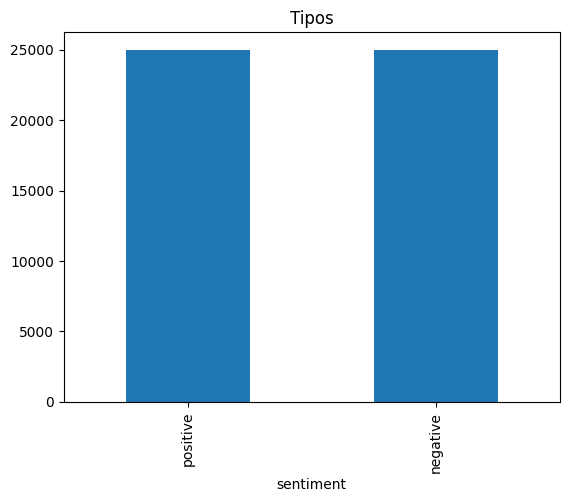

In [4]:
#Mostrar gráfico de tipos de review
df["sentiment"].value_counts().plot.bar(title='Tipos',rot=90)

# Etapa da Pré-Processamento dos Dados

In [5]:
#Download do pacote de palavras
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
#Mostrar o primeiro review e a quantidade de palavras presentes
review_1 = df['review'].values[0]
print(review_1)
print(len(review_1.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [7]:
#Remover stopwords e pontuação
from nltk.tokenize import word_tokenize
import string
from nltk.stem import SnowballStemmer

nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)

#Definição dos dados de setmming (remoção de sufixos)
min_size = 1
ignore = ['...', 'br','.so','\'ll']
stemmer = SnowballStemmer('english')

def prepare_text(texto):
    words = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    words = [i for i in words if len(i) > min_size]
    words = [i for i in words if i not in ignore]
    words = [stemmer.stem(i) for i in words]
    words = [i for i in words if i not in stopwords]
    return words

prepared_text = prepare_text(review_1)

#Mostrar resultado do exemplo já preparado
print(prepared_text)
print(len(prepared_text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'right', 'exact', 'happen', 'me.', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word.', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '....', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget', 'romanc', 'oz', 'doe', "

In [8]:
#Preparação do texto do resto do dataset (processamento pode demorar)
df['prepared_set'] = df['review'].apply(prepare_text)
df['prepared_set'] = df['prepared_set'].apply(' '.join)

In [9]:
#Mostrar a nova coluna prepared_set com o texto já processado
df.head()

,review,sentiment,prepared_set
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu veri unassu...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


In [10]:
#Divisão de dados para treinamento (utilizando o padrão 80/20, sendo os 80% para treino e 20% para testes)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['prepared_set'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,1))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_x_train shape:',bow_x_train.shape)
print('bow_x_test shape:',bow_x_test.shape)

bow_x_train shape: (40000, 32221)
bow_x_test shape: (10000, 32221)


In [12]:
#Criação de one-hot-encoding para os dados
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:',ohe_y_train.shape)
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


# Treinamento do Modelo

In [13]:
#Treinamento com Regressão Logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [14]:
#Demonstração dos resultados
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(bow_x_test)
print("LogReg Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score : 0.5417
              precision    recall  f1-score   support

    Positive       0.53      0.89      0.66      5035
    Negative       0.63      0.19      0.29      4965

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.48     10000
weighted avg       0.58      0.54      0.48     10000



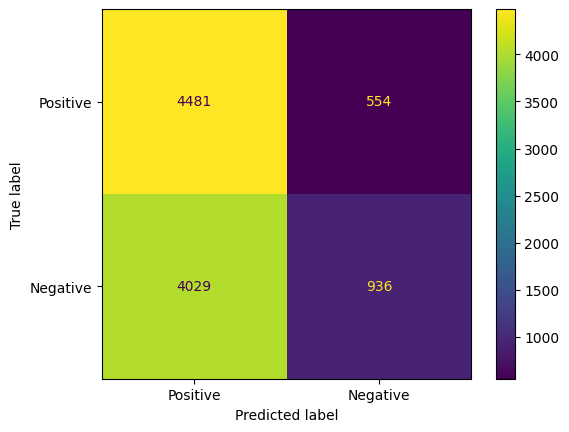

In [16]:
#Gráfico da matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ohe_y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot()

Pode-se perceber que a acurácia do modelo não está eficiente, sendo de 53%. Podemos melhorar esse resultado utilizando N-Gramas

## Melhoria do Modelo com N-Gramas e TF-IDF

In [17]:
#Criação de n-gramas de 2 palavras
MAX_FEATURES=100000
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents='unicode',ngram_range=(2,2),max_features=MAX_FEATURES)
tfidf_x_train = tfidf.fit_transform(X_train)
tfidf_x_test = tfidf.transform(X_test)
print('tfidf_x_train shape:',tfidf_x_train.shape)
print('tfidf_x_test shape:',tfidf_x_test.shape)

tfidf_x_train shape: (40000, 100000)
tfidf_x_test shape: (10000, 100000)


In [18]:
#Treinamento com regressão logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=50000, C=1, random_state=42)
lr.fit(tfidf_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=50000, random_state=42)


In [19]:
#Demonstração dos resultados
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(tfidf_x_test)
accuracy = accuracy_score(ohe_y_test , y_predict)
report = classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative'])
print("LogReg Score :",accuracy)
print(report)

LogReg Score : 0.8701
              precision    recall  f1-score   support

    Positive       0.88      0.86      0.87      5035
    Negative       0.86      0.88      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



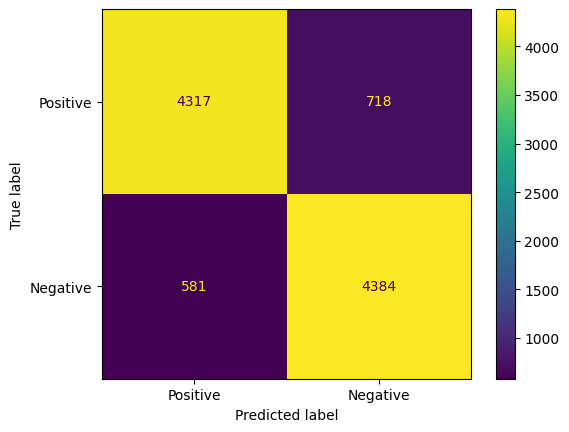

In [20]:
#Gráfico da matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ohe_y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot()

In [21]:
#Comparação com n-gramas de 3 palavras
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents='unicode',ngram_range=(3,3),max_features=MAX_FEATURES)
tfidf_x_train = tfidf.fit_transform(X_train)
tfidf_x_test = tfidf.transform(X_test)
print('tfidf_x_train shape:',tfidf_x_train.shape)
print('tfidf_x_test shape:',tfidf_x_test.shape)

tfidf_x_train shape: (40000, 100000)
tfidf_x_test shape: (10000, 100000)


In [22]:
#Treinamento com regressão logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=50000, C=1, random_state=42)
lr.fit(tfidf_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=50000, random_state=42)


In [23]:
#Demonstração dos resultados
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(tfidf_x_test)
accuracy = accuracy_score(ohe_y_test , y_predict)
report = classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative'])
print("LogReg Score :",accuracy)
print(report)

LogReg Score : 0.7695
              precision    recall  f1-score   support

    Positive       0.80      0.73      0.76      5035
    Negative       0.75      0.81      0.78      4965

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



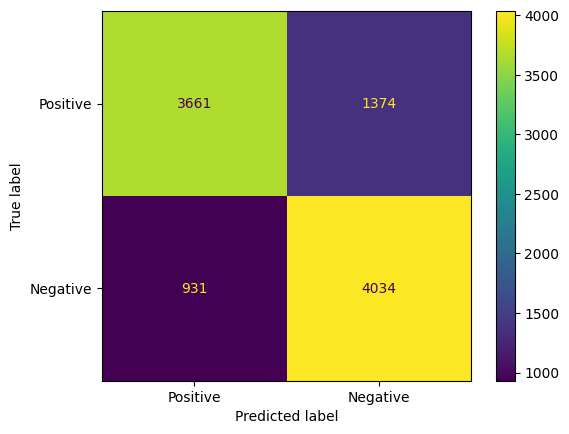

In [24]:
#Gráfico da matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ohe_y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot()

**Pode-se perceber que os resultados com N-gramas de 2 palavras são mais precisos, portanto a seguir vamos manter o range entre 1 e 3 para buscarmos o melhor resultado possível**

In [25]:
#N-gramas no range de 1 a 3
MAX_FEATURES=100000
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents='unicode',ngram_range=(1,3),max_features=MAX_FEATURES)
tfidf_x_train = tfidf.fit_transform(X_train)
tfidf_x_test = tfidf.transform(X_test)
print('tfidf_x_train shape:',tfidf_x_train.shape)
print('tfidf_x_test shape:',tfidf_x_test.shape)

tfidf_x_train shape: (40000, 100000)
tfidf_x_test shape: (10000, 100000)


In [26]:
#Treinamento com regressão logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=50000, C=1, random_state=42)
lr.fit(tfidf_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=50000, random_state=42)


In [27]:
#Demonstração dos resultados
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(tfidf_x_test)
accuracy = accuracy_score(ohe_y_test , y_predict)
report = classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative'])
print("LogReg Score :",accuracy)
print(report)

LogReg Score : 0.894
              precision    recall  f1-score   support

    Positive       0.90      0.89      0.89      5035
    Negative       0.89      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



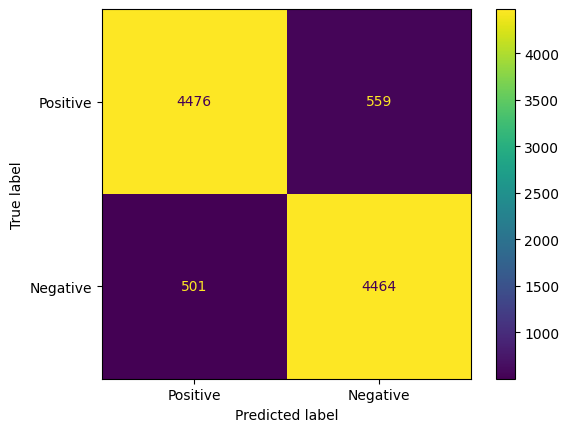

In [29]:
#Gráfico da matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ohe_y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot()

**O modelo com range de 1 a 3 demonstrou melhor acurácia**

Agora podemos testar o modelo com análises simples para verficarmos o resultado

# Testes

In [30]:
#Função para informar se um texto recebido é uma análise positiva ou negativa
def new_prediction(text):
  vector_text = tfidf.transform([text])
  pred = lr.predict(vector_text)

  if pred == 0:
    return 'Positivo'
  else:
    return 'Negativo'

new_prediction("I really liked the movie")
new_prediction("I hated it")

'Negativo'

Agora podemos testar com outros dados, dessa vez de críticas do Rotten Tomatoes

In [31]:
df_rt = pd.read_csv("https://drive.usercontent.google.com/download?confirm=9iBg&id=1BVHNlEOYpD5MOah2Fr76aqC0sS7rLKG2&export=download", header=0)
df_rt.head(n=10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."


In [32]:
#Verificar quantos dados de cada sentimento estão disponíveis
df_rt['review_type'].value_counts()

review_type
Fresh     720210
Rotten    409807
Name: count, dtype: int64

In [33]:
#Remover nulos
df_rt.dropna(subset=['review_content'], inplace=True)

df_rt = df_rt.head(n=50000)
print(len(df_rt))

50000


In [34]:
#Preparação do texto do resto do dataset (processamento pode demorar)
df_rt['prepared_set'] = df_rt['review_content'].apply(prepare_text)
df_rt['prepared_set'] = df_rt['prepared_set'].apply(' '.join)

In [35]:
#Mostrar dados preparados
df_rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,prepared_set
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,fantasi adventur fuse greek mytholog contempor...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",uma thurman medusa gorgon coiffur writh snake ...
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,top-notch cast dazzl special effect tide teen ...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,whether audienc get behind lightn thief hard p...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,'s realli lack lightn thief genuin sens wonder...


In [36]:
makes = []
misses = []
#Testamos os resultados
for i, row in df_rt.iterrows():
  expected = 'Positivo' if row['review_type'] == 'Fresh' else 'Negativo'
  result = new_prediction(row['prepared_set'])
  if result == expected:
    makes.append(result)
  else:
    misses.append(result)

print('Acertos: ', len(makes))
print('Erros: ', len(misses))

Acertos:  12878
Erros:  37122


Com esses dados, podemos verificar que o modelo ainda não está atingindo o resultado ideal, necessitando de maiores ajustes.
A utilização de modelos pré-treinados, como Word2Vec ou GloVe pode ser mais eficaz para a resolução desses problemas, visto que estes já possuem treinamento com bilhões de palavras.